In [283]:
import os
import json
import requests
from src.najdi_rok import najdi_rok
import pandas as pd

In [284]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

## Příprava dat

In [285]:
odkud = 'data_raw/nobelistvo'

In [286]:
df = pd.DataFrame()
for f in os.listdir(odkud):
    pracovni = pd.read_parquet(os.path.join(odkud, f))
    kod = f.split('_')[2].split('.')[0]
    pracovni = pracovni[pracovni['100_7'].astype(str).str.contains(kod, na=False)]
    if len(pracovni) == 0:
        print(f"{f}: nulová délka")
    df = pd.concat([df, pracovni])

nobelovka_1977_jn19990000099.parquet: nulová délka


C:\Users\micha\AppData\Local\Temp\ipykernel_30992\3977322801.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pracovni])
C:\Users\micha\AppData\Local\Temp\ipykernel_30992\3977322801.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pracovni])


In [287]:
df.loc[df['008'] == '150413q20142015xr     g      000 p cze', 'rok']=2014

In [288]:
koho = pd.read_json(os.path.join('data_raw','wikidata_nobelovky_pro_filtr.json'))

In [292]:
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [293]:
df = df.explode(['100_a','100_7'])

In [294]:
df['100_a'] = df['100_a'].apply(lambda x: x[:-1] if x != None else None)

In [295]:
df[~df['100_a'].str.contains(',',na=False)]

,008,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,700_ind1,700_a,700_4,700_d,700_7,700_t,700_q,700_l,700_ind2,700_c,700_b,700_i,700_n,700_k,700_m,700_r,700_p,700_o,700_s,700_e,700_6,700_x,700_f,700_g,rok,nobelovka,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk194002023,990514s1940 xr cze,[0],Halldór Laxness,jn19981001730,[aut],[1902-1998],None,None,None,None,[1],[0],[Salka Valka :],[Islandské děvče : Román /],[Napsal Halldór Kiljan Laxness ; Přeložila M. ...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1940.0,1955,Salka Valka
bk194902261,981025s1949 xr ||| 1 cze,[0],Halldór Laxness,jn19981001730,[aut],[1902-1998],None,None,None,None,[1],[0],[Svobodný lid /],None,[Halldór Laxness ; [Z dán.] přel. a doslov nap...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1949.0,1955,Svobodný lid
bk194903682,981117s1949 xr 1 cze,[0],Halldór Laxness,jn19981001730,[aut],[1902-1998],None,None,None,None,[1],[0],[Úsvit nad slatinami /],None,[Halldór Laxness ; [Z dán. orig.] přel. a dosl...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1949.0,1955,Úsvit nad slatinami
bk195504372,981116s1955 xr cze,[0],Halldór Laxness,jn19981001730,[aut],[1902-1998],None,None,None,None,[1],[0],[Islandský zvon /],None,[Halldór Laxness ; Z islandských orig. Íslands...,None,None,None,None,None,None,[1],"[Rak, Jan,]",[aui],[1920-],[jk01101981],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1955.0,1955,Islandský zvon
bk195603733,981127s1956 xr e 000 d cze,[0],Halldór Laxness,jn19981001730,[aut],[1902-1998],None,None,None,None,[1],[0],[Prodaná ukolébavka :],[Hra o 4 dějstvích a 6 obrazech /],[Naps. Halldor Laxness ; [Z islandského orig. ...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1956.0,1955,Prodaná ukolébavka
bk195701964,981014s1957 xr ||| 1 cze,[0],Halldór Laxness,jn19981001730,[aut],[1902-1998],None,None,None,None,[1],[0],[Atomová stanice /],None,[[Autor:] Halldór Kiljan Laxness ; z dán. přek...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1957.0,1955,Atomová stanice
bk195905082,980902s1959 xr 000 cze,[0],Halldór Laxness,jn19981001730,[aut],[1902-1998],None,None,None,None,[1],[0],[Světlo světa /],None,[Halldór Kiljan Laxness ; [přeložil Jan Rak]],None,None,None,None,None,None,[1],"[Rak, Jan,]",[trl],[1920-],[jk01101981],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1959.0,1955,Světlo světa
bk196203875,980710s1962 xr ||| | cze,[0],Halldór Laxness,jn19981001730,[aut],[1902-1998],None,None,None,None,[1],[0],[Gerpla :],[Hrdinská sága /],[Halldór Kiljan Laxness ; Ze švédského orig. G...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1962.0,1955,Gerpla
bk196403828,971209s1964 xr ||| | cze,[0],Halldór Laxness,jn19981001730,[aut],[1902-1998],None,None,None,None,[1],[0],[Salka Valka /],None,[Halldór Kiljan Laxness ; Ze [stejnojm.] švéds...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1964.0,1955,Salka Valka


In [296]:
df['100_a'] = df['100_a'].apply(lambda x: f"{x.split(',')[1]} {x.split(',')[0]}" if ',' in x else x)

In [297]:
df.sample(10)

,008,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,700_ind1,700_a,700_4,700_d,700_7,700_t,700_q,700_l,700_ind2,700_c,700_b,700_i,700_n,700_k,700_m,700_r,700_p,700_o,700_s,700_e,700_6,700_x,700_f,700_g,rok,nobelovka,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nos190120859,000131s1910 xr cze,[1],Rudyard Kipling,jn19990004353,[aut],[1865-1936],None,None,None,None,[1],[0],[Fantom nosítek /],None,[Rudyard Kipling ; přel. Cyril Žďárský],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1910.0,1907,Fantom nosítek
bk193702926,990219s1937 xr ||| | cze,[1],Thomas Mann,jn19990005365,[aut],[1875-1955],None,None,None,None,[1],[0],[Odpověď =],[(Briefwechsel) /],[Thomas Mann ; [přeložil z němčiny Otokar Fisc...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1937.0,1929,Odpověď =
bk198205853,961010s1981 xr a 000 | cze,[1],Bjørnstjerne Bjørnson,jn19990000824,[aut],[1832-1910],None,None,None,None,[1],[0],[Synnøve ze Slunečného návrší /],None,[Bjørnstjerne Bjørnson ; [z norského originálu...,None,None,None,None,None,None,"[1, 1]","[Köllnová-Ehrmannová, Božena,, Wernischová, He...","[aui, ill]","[1929-2006, 1942-]","[jk01061373, jk01151616]",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1981.0,1903,Synnøve ze Slunečného návrší
cpk20051538620,050809s2005 xr e e 001 0acze,[1],Winston Churchill,jn19990003864,[aut],[1874-1965],None,"[Sir,]",None,None,[1],[0],[Druhá světová válka.],None,[Winston S. Churchill ; [z anglického originál...,"[III. díl,]",[Velká aliance /],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2005.0,1953,Druhá světová válka.
bknhra08612,041209s1919 xr e ||| 1 cze,[1],Bernard Shaw,jn19990007481,[aut],[1856-1950],None,None,None,None,[1],[0],[Člověk a nadčlověk :],[Komedie a filosofie /],[Bernard George Shaw ;z angličtiny přeložil Iv...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1919.0,1925,Člověk a nadčlověk
np9532932,950223s1994 xr a g u0|0 p cze,[1],Jaroslav Seifert,jk01110657,[aut],[1901-1986],None,None,None,None,[1],[0],[Polibek na cestu :],[Výbor milostné lyriky /],[Jaroslav Seifert ; ilustr. a graf. úprava Jiř...,None,None,None,None,None,None,[1],"[Müller, Jiří,]",[ill],[1934-2014],[jk01082426],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1994.0,1984,Polibek na cestu
bkn20011005778,010710q19001920xr c 000 j cze,[1],Rudyard Kipling,jn19990004353,[aut],[1865-1936],None,None,None,None,[1],[0],[Kniha džunglí /],None,[Rudyard Kipling],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,1907,Kniha džunglí
cpk20031203008,031013s2003 xr a g 000 f cze,[1],William Golding,jn19990002751,[aut],[1911-1993],None,None,None,None,[1],[0],[Pán much /],None,[William Golding ; [přeložila Heda Kovályová ;...,None,None,None,None,None,None,"[1, 1, 1]","[Kostić, Andrej Sujetov,, Kovályová, Heda,, Ne...","[ill, trl, aui]","[1968-, 1919-2010, 1929-2018]","[xx0011302, jk01062415, jk01083165]",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2003.0,1983,Pán much
cpk19970216203,971114s1997 xr b e 000 mbcze,[1],Winston Churchill,jn19990003864,[aut],[1874-1965],None,"[Sir,]",None,None,[1],[0],[Příběh malakandského sboru :],[vzrušující zpráva tehdy začínajícího dopisova...,[Winston S. Churchill ; [z angličtiny přeložil...,None,None,None,None,None,None,[1],"[Zummer, Josef]",[trl],None,[xx0208532],None,None,None,None,None,None,

In [303]:
df['rozdil'] = df['rok'] - df['nobelovka']

## Kontrola dat

In [290]:
[r for r in range(1901,2025) if r not in koho['nobelovka'].to_list()]

[1914, 1918, 1935, 1940, 1941, 1942, 1943, 2024]

In [291]:
len(koho)

120

In [298]:
df['100_a'].nunique()

118

In [299]:
df.groupby('100_7')['100_a'].nunique().nlargest()

100_7
jk01110657       1
jn19981001227    1
jn19981001318    1
jn19981001567    1
jn19981001730    1
Name: 100_a, dtype: int64

## První vydané knihy nobeliststva

In [300]:
df.sort_values(by='rok').head(5)

,008,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,700_ind1,700_a,700_4,700_d,700_7,700_t,700_q,700_l,700_ind2,700_c,700_b,700_i,700_n,700_k,700_m,700_r,700_p,700_o,700_s,700_e,700_6,700_x,700_f,700_g,rok,nobelovka,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bknjfs00162,010618s1873 xr e 000 j cze,[1],Bjørnstjerne Bjørnson,jn19990000824,[aut],[1832-1910],None,None,None,None,[1],[0],[Björnstjerne Björnsona Selské novely /],None,[po česku podává Hynek Mejsnar],None,None,None,None,None,None,[1],"[Mejsnar, Hynek Jaroslav,]",[trl],[1837-1895],[jk01081083],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1873.0,1903,Björnstjerne Björnsona Selské novely
bknjfs00161,020408s1874 xr e 000 d cze,[1],Bjørnstjerne Bjørnson,jn19990000824,[aut],[1832-1910],None,None,None,None,[1],[0],[Novomanželé :],[rodinný obraz ve dvou jednáních /],[od Björnstjern Björnsona ; dle Kurzova vzdělá...,None,None,None,None,None,None,[1],"[Pešková, Eliška,]",[trl],[1833-1895],[jk01092674],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1874.0,1903,Novomanželé
bknjfs00166,010618s1875 xr e 000 j cze,[1],Bjørnstjerne Bjørnson,jn19990000824,[aut],[1832-1910],None,None,None,None,[1],[0],[Selské novely /],None,[sepsal Björnson Björnstjerne ; přeložil Hynek...,None,None,None,None,None,None,[1],"[Mejsnar, Hynek Jaroslav,]",[trl],[1837-1895],[jk01081083],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1875.0,1903,Selské novely
bknjfs00159,010618s1877 xr e 000 d cze,[1],Bjørnstjerne Bjørnson,jn19990000824,[aut],[1832-1910],None,None,None,None,[1],[0],[Bankrot :],[činohra ve čtyrech jednáních /],[napsal Bjoernstjerne Bjoernson ; přeložil J. ...,None,None,None,None,None,None,[1],"[Bittner, Jiří,]",[trl],[1846-1903],[jk01012169],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1877.0,1903,Bankrot
bknaus04628,011123s1881 xr 000 0 cze,[1],Henryk Sienkiewicz,jn19990007946,[aut],[1846-1916],None,None,None,None,[1],[0],[Čí vinou? :],[dramatický obraz v jednom jednání /],[od Henryka Sienkieviče ; z polského přeložil ...,None,None,None,None,None,None,[1],"[Frič, Coelestin,]",[trl],[1856-1886],[jk01031864],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1881.0,1905,Čí vinou?


## Nejvydávanější

In [301]:
df.groupby('100_a')['titul'].nunique().nlargest(150)

100_a
 Jaroslav Seifert                        153
 Rudyard Kipling                          81
 Anatole France                           66
 Henryk Sienkiewicz                       66
 Bernard Shaw                             65
 Romain Rolland                           59
 John Galsworthy                          49
 Thomas Mann                              41
 Hermann Hesse                            40
 Rabíndranáth Thákur                      39
 Luigi Pirandello                         38
 Isaac Bashevis Singer                    37
 Knut Hamsun                              34
 Bjørnstjerne Bjørnson                    33
 Selma Lagerlöf                           33
 Maurice Maeterlinck                      32
 André Gide                               27
 John Steinbeck                           25
 Władysław Stanisław Reymont              25
 Sinclair Lewis                           25
 Ivan Aleksejevič Bunin                   25
 William Faulkner                         24
 Ern

In [302]:
df.groupby('100_7')['titul'].nunique().reindex(koho['100_7'].to_list()).nlargest(150)

100_7
jk01110657           153.0
jn19990004353         81.0
jn19990007946         66.0
jn19981001227         66.0
jn19990007481         65.0
jn19990007118         59.0
jn19990002542         49.0
jn19990005365         41.0
jn19990003467         40.0
jn19981002206         39.0
jn20000604446         38.0
jn19990007991         37.0
jn20000602790         34.0
jn19990000824         33.0
jn19990004817         33.0
jn19990005277         32.0
jn19990002664         27.0
jn19990008205         25.0
jn19990005053         25.0
jn19990006988         25.0
jn19990210139         25.0
jn19990003371         24.0
jn19990002183         24.0
jn19981001318         23.0
jn20000604273         22.0
jn19990001184         22.0
jn19990008691         21.0
jn19990005491         19.0
jn19990006057         19.0
jn19990003245         19.0
jn19990001315         18.0
jn19990000996         18.0
jn19990002840         18.0
jn19990009341         17.0
jn19990008739         16.0
jn19990007359         16.0
jn20010601143         

## Kdy se vydávají

<Axes: ylabel='Frequency'>

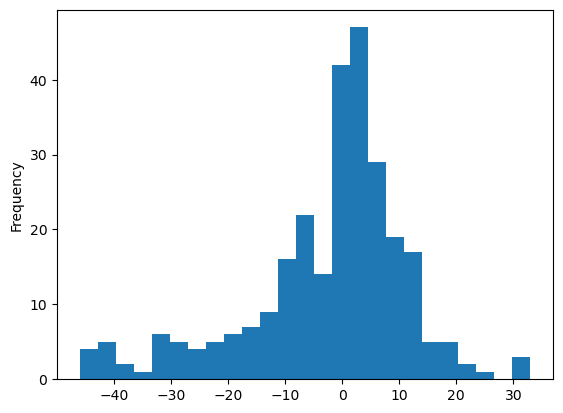

In [304]:
df[df['nobelovka'] >= 1990]['rozdil'].plot.hist(bins=25)

In [305]:
df[df['rozdil'] < 0].groupby('100_a')['titul'].nunique().nlargest()

100_a
Jaroslav Seifert      109
Henryk Sienkiewicz     41
Anatole France         25
André Gide             25
John Galsworthy        21
Name: titul, dtype: int64

In [306]:
df.groupby('100_a')['rozdil'].min().nlargest(200)

100_a
 Jiorgos Seferis                         48.0
 Theodor Mommsen                         35.0
 Nelly Sachs                             34.0
 Shmuel Yosef Agnon                      33.0
 Gabriela Mistral                        25.0
 Odysseus Elytis                         24.0
 Derek Walcott                           18.0
 Jacinto Benavente                       17.0
 Yasunari Kawabata                       16.0
 Pär Lagerkvist                          13.0
 Iosif Aleksandrovič Brodskij            10.0
 Xingjian Gao                            10.0
 Czesław Miłosz                          10.0
 Isaac Bashevis Singer                    9.0
 Erik Axel Karlfeldt                      8.0
 Frédéric Mistral                         8.0
 Rudolf Eucken                            6.0
Saint-John Perse                          5.0
 Juan Ramón Jiménez                       5.0
 José Saramago                            4.0
 Eugenio Montale                          4.0
 Paul Heyse                 

In [307]:
poradi = df[['100_a','nobelovka']].sort_values(by='nobelovka')
poradi = poradi['100_a'].drop_duplicates().to_list()

In [308]:
df.groupby('100_a')['rozdil'].min().reindex(poradi)

100_a
 Erik Axel Karlfeldt                      8.0
 Theodor Mommsen                         35.0
 Bjørnstjerne Bjørnson                  -30.0
 Frédéric Mistral                         8.0
 José Echegaray                         -12.0
 Henryk Sienkiewicz                     -24.0
 Giosue Carducci                        -16.0
 Rudyard Kipling                        -14.0
 Rudolf Eucken                            6.0
 Selma Lagerlöf                          -8.0
 Paul Heyse                               3.0
 Maurice Maeterlinck                    -11.0
 Gerhart Hauptmann                      -17.0
 Rabíndranáth Thákur                      1.0
 Romain Rolland                           1.0
 Verner von Heidenstam                    0.0
 Henrik Pontoppidan                     -22.0
 Karl Adolf Gjellerup                     2.0
 Carl Spitteler                           2.0
 Knut Hamsun                            -23.0
 Anatole France                         -26.0
 Jacinto Benavente          

<Axes: xlabel='100_a'>

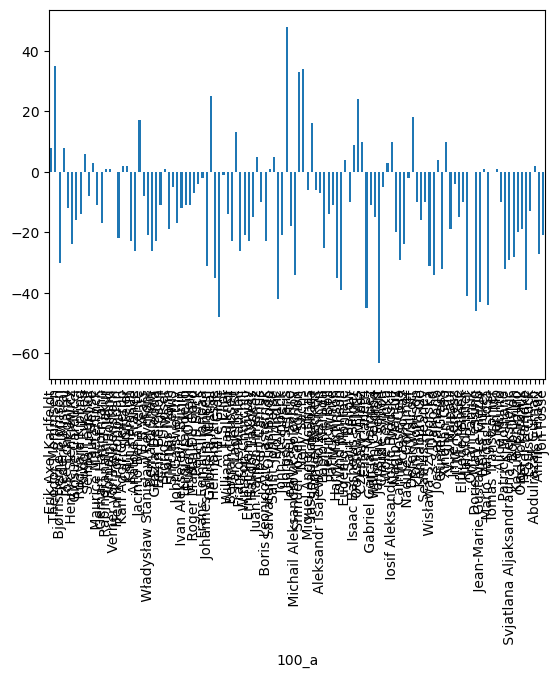

In [309]:
df.groupby('100_a')['rozdil'].min().reindex(poradi).plot.bar()

<Axes: xlabel='rozdil', ylabel='100_a'>

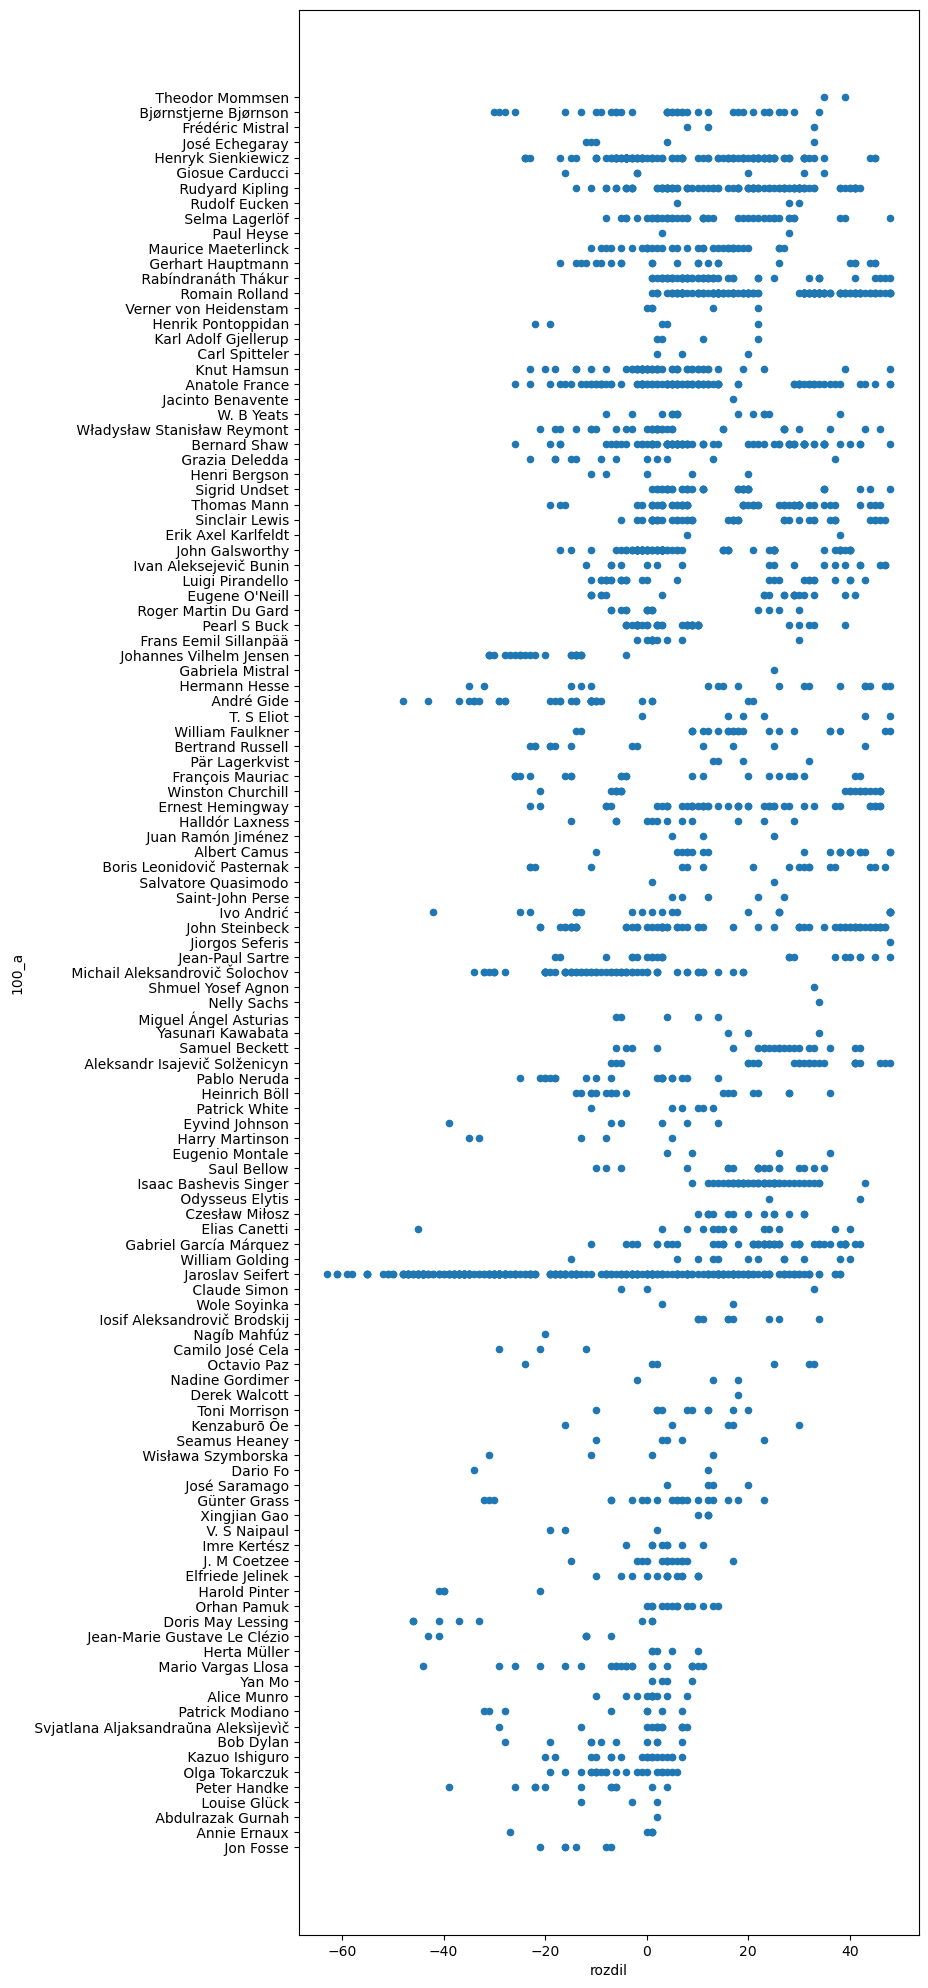

In [368]:
df[df['rozdil'] <= df.groupby('100_7')['rozdil'].min().max()].sort_values('nobelovka',ascending=False)[['100_a','rozdil']].plot.scatter(x='rozdil',y='100_a',figsize=(8,25))

In [311]:
len(df[df['rozdil'].isin([1,2,3])]) / len(df[df['rozdil'].isin([-1,-2,-3])])

1.8294573643410852

In [312]:
df.groupby('100_7')['rozdil'].min().nlargest(200)

100_7
jn20000402202        48.0
skuk0000903          35.0
jn20000810312        34.0
jn20000600054        33.0
jn19981001854        25.0
ola2002161265        24.0
kup19950000109491    18.0
jn19990000655        17.0
jn20000603323        16.0
jn19990004816        13.0
jo20000075484        10.0
jn19990005739        10.0
jn19990001110        10.0
jn19990007991         9.0
xx0047446             8.0
jo20000080728         8.0
skuk0000369           6.0
jn19990007305         5.0
jn19981001567         5.0
jn20000604067         4.0
xx0001988             4.0
jn20000605097         3.0
jn20000700710         3.0
jn20010602599         2.0
jn20010420012         2.0
xx0011793             2.0
kv2013742559          1.0
jn19990008691         1.0
jn19981002206         1.0
jn20000604537         1.0
jn19990007118         1.0
jn19990005954         1.0
jo2006321171          0.0
jn19990003311         0.0
jn19990002039        -1.0
jn19990002779        -2.0
xx0003184            -2.0
jn19990001184        -4.0
jn2000

## Graf

In [719]:
dografu = df[(df['rozdil'] <= df.groupby('100_7')['rozdil'].min().max())].sort_values('nobelovka',ascending=False)[['100_a','rozdil','nobelovka']] # .rename(columns={'100_a':'jméno','rozdil':'vydání před/po nobelovce'})

In [721]:
dografu

,100_a,rozdil,nobelovka
001,,,
nkc20162796275,Jon Fosse,-7.0,2023
nkc20152697140,Jon Fosse,-8.0,2023
nkc20091930817,Jon Fosse,-14.0,2023
nkc20071758190,Jon Fosse,-16.0,2023
nkc20071712779,Jon Fosse,-16.0,2023
...,...,...,...
nkc20071752875,Bjørnstjerne Bjørnson,-16.0,1903
bk192604454,Bjørnstjerne Bjørnson,23.0,1903
cpk20000960946,Theodor Mommsen,39.0,1902


In [723]:
dografu['100_a'] = dografu.apply(lambda row: f"{row['100_a'].split( )[-1].strip()} ({row['nobelovka']})", axis=1)

In [725]:
dografu

,100_a,rozdil,nobelovka
001,,,
nkc20162796275,Fosse (2023),-7.0,2023
nkc20152697140,Fosse (2023),-8.0,2023
nkc20091930817,Fosse (2023),-14.0,2023
nkc20071758190,Fosse (2023),-16.0,2023
nkc20071712779,Fosse (2023),-16.0,2023
...,...,...,...
nkc20071752875,Bjørnson (1903),-16.0,1903
bk192604454,Bjørnson (1903),23.0,1903
cpk20000960946,Mommsen (1902),39.0,1902


In [753]:
with open(os.path.join("src","scatter_template.html"), "r", encoding="utf-8") as template:
    template = template.read()

In [737]:
kategorie = [f'"{x.strip()}"' for x in dografu['100_a'].drop_duplicates().to_list()][::-1]

In [731]:
serie = []
pocitadlo = 0
for x in dografu.sort_values("nobelovka")['100_a'].drop_duplicates().to_list():
    slovnik = {}
    slovnik['name'] = x
    data = []
    for index, radek in dografu[dografu['100_a'] == x].iterrows():
        data.append([radek['rozdil'], pocitadlo])
    slovnik['data'] = data
    serie.append(slovnik)
    pocitadlo = pocitadlo + 1

In [709]:
serie

[{'name': 'Karlfeldt (1901)', 'data': [[38.0, 0]]},
 {'name': 'Mommsen (1902)', 'data': [[39.0, 1], [35.0, 1]]},
 {'name': 'Bjørnson (1903)',
  'data': [[24.0, 2],
   [26.0, 2],
   [-5.0, 2],
   [-6.0, 2],
   [-10.0, 2],
   [-13.0, 2],
   [-9.0, 2],
   [21.0, 2],
   [5.0, 2],
   [4.0, 2],
   [4.0, 2],
   [-7.0, 2],
   [-30.0, 2],
   [-29.0, 2],
   [-26.0, 2],
   [34.0, 2],
   [27.0, 2],
   [-28.0, 2],
   [-3.0, 2],
   [-6.0, 2],
   [29.0, 2],
   [4.0, 2],
   [7.0, 2],
   [17.0, 2],
   [18.0, 2],
   [19.0, 2],
   [5.0, 2],
   [6.0, 2],
   [8.0, 2],
   [4.0, 2],
   [24.0, 2],
   [6.0, 2],
   [10.0, 2],
   [7.0, 2],
   [12.0, 2],
   [-16.0, 2],
   [23.0, 2]]},
 {'name': 'Echegaray (1904)',
  'data': [[4.0, 3], [33.0, 3], [-11.0, 3], [-12.0, 3], [-10.0, 3]]},
 {'name': 'Mistral (1904)', 'data': [[33.0, 4], [8.0, 4], [12.0, 4]]},
 {'name': 'Sienkiewicz (1905)',
  'data': [[-4.0, 5],
   [-3.0, 5],
   [1.0, 5],
   [-10.0, 5],
   [-7.0, 5],
   [-7.0, 5],
   [28.0, 5],
   [17.0, 5],
   [-8.0, 5

In [755]:
export_grafu = template.replace("TITULEK","Titulek grafu").replace("KATEGORIE",f"[{','.join(kategorie)}]").replace('SERIE',str(serie))

In [757]:
with open(os.path.join("grafy","scatter_nobelovky_export.html"), "w+", encoding="utf-8") as vystupni_graf:
    vystupni_graf.write(export_grafu)

## Kdo to překládá

In [316]:
prekladatelstvo = df.dropna(subset=['700_4','700_7','700_a']).explode(['700_4','700_7','700_a'])

In [317]:
prekladatelstvo[prekladatelstvo['700_4'] == 'trl'].groupby('700_a')['100_a'].nunique().nlargest(10)

700_a
Kondrysová, Eva,                6
Krausová-Lesná, Milada,         6
Valja, Jiří,                    6
Hackenschmied, Hanuš,           5
Vrba, František,                5
Eisner, Pavel,                  4
Hron, Zdeněk,                   4
Kosterka, Hugo,                 4
Köllnová-Ehrmannová, Božena,    4
Nenadál, Radoslav,              4
Name: 100_a, dtype: int64